In [11]:
import json

import ml_helper
import ml_plots

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [12]:
COLORS = {
    'red': '#B56576',
    'blue': '#187795',
    'green': '#3F9A73' , #'#47B887', #'#38686A',
    'brown': '#DBCFB0',
    'yellow': '#D5C67A'
}

In [13]:
# load latest data if keyword is in the file name
hist_name_cnn = ml_helper.get_newest_file('histories/', name='CNN', extension=".json", ensemble=False)
print(f"Loading {hist_name_cnn}")

hist_name_transformer = ml_helper.get_newest_file('histories/', name='Transformer_history', extension=".json", ensemble=False)
print(f"Loading {hist_name_transformer}")

Loading histories/CNN_history_2025-02-16_03-37-28.json
Loading histories/Transformer_history_2025-02-16_03-39-21.json


In [14]:
hist_cnn = None
with open(hist_name_cnn, 'r') as file:
    hist_cnn = json.load(file)

labels_cnn = hist_cnn['test_labels']
preds_cnn = hist_cnn['test_preds']

In [15]:
hist_trans= None
with open(hist_name_transformer, 'r') as file:
    hist_trans = json.load(file)

labels_trans = hist_trans['test_labels']
preds_trans = hist_trans['test_preds']

In [16]:
def save_plot(plt, title):
    pass

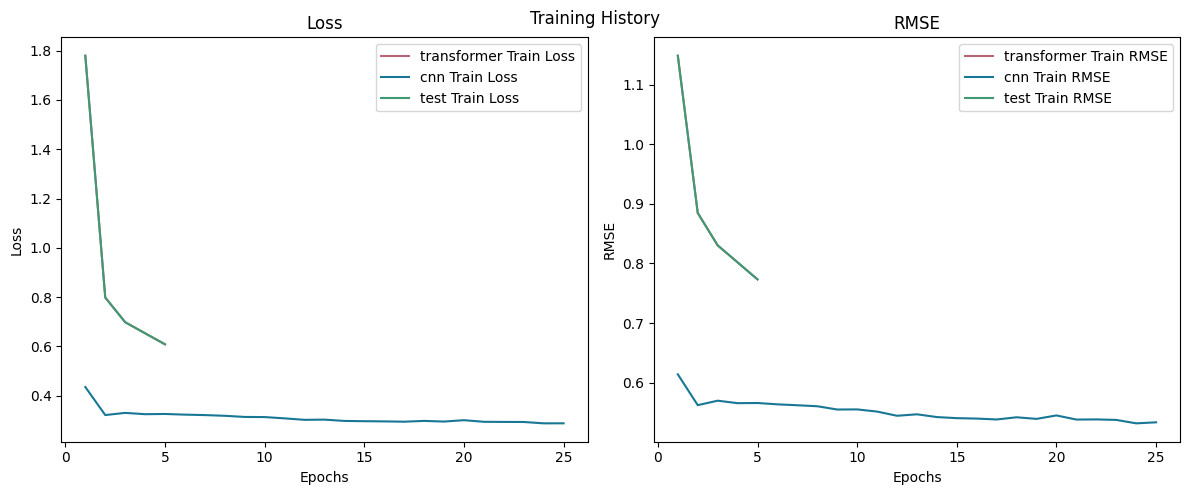

In [21]:
def plot_training_histories(hist_datas, names, colors, title='Training History', include_val=True, save=True):
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    color_keys = list(colors.keys())
    color_counter = 0

    for hist_data, name in zip(hist_datas, names):
        epochs = range(1, len(hist_data['train_loss']) + 1)

        color = colors[color_keys[color_counter]]
        color_counter = (color_counter + 1) % len(color_keys)

        # Plot RMSE
        axs[1].plot(epochs, hist_data['train_rmse'], label=f'{name} Train RMSE', color=color)
        if include_val:
            axs[1].plot(epochs, hist_data['val_rmse'], label=f'{name} Validation RMSE', color=color, linestyle='dashed')
        axs[1].set_title('RMSE')
        axs[1].set_xlabel('Epochs')
        axs[1].set_ylabel('RMSE')
        axs[1].legend()

        # Plot Loss
        axs[0].plot(epochs, hist_data['train_loss'], label=f'{name} Train Loss', color=color)
        if include_val:
            axs[0].plot(epochs, hist_data['val_loss'], label=f'{name} Validation Loss', color=color, linestyle='dashed')
        axs[0].set_title('Loss')
        axs[0].set_xlabel('Epochs')
        axs[0].set_ylabel('Loss')
        axs[0].legend()

    plt.tight_layout()
    plt.suptitle(title)

    # Save plot
    if save:
        save_plot(plt, title)
    
    return plt

plot_training_histories([hist_cnn, hist_trans, hist_cnn],  ['transformer', 'cnn', 'test'], colors=COLORS, include_val=False).show()

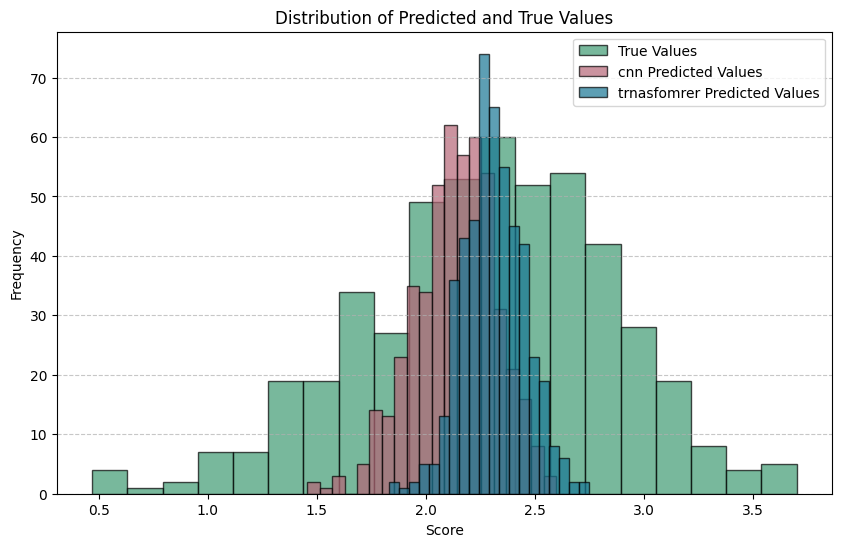

In [ ]:
def plot_distributions(true_values, predicted_values_list, names, colors, title='Distribution of Predicted and True Values', save=True):
    plt.figure(figsize=(10, 6))
    color_keys = list(colors.keys())
    color_counter = 0

    # Plot true values
    plt.hist(true_values, bins=20, color=colors['green'], edgecolor='black', alpha=0.7, label='True Values')

    # Plot predicted values for each model
    for predicted_values, name in zip(predicted_values_list, names):
        color = colors[color_keys[color_counter]]
        color_counter = (color_counter + 1) % len(color_keys)
        plt.hist(predicted_values, bins=20, color=color, edgecolor='black', alpha=0.7, label=f'{name} Predicted Values')

    plt.title(title)
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    # save plot
    if save:
        save_plot(plt, title)
    return plt

plot_distributions(labels_cnn, [preds_cnn, preds_trans], names=['cnn', 'transformer'], colors=COLORS).show()


In [24]:
import matplotlib.gridspec as gridspec

from sklearn.linear_model import LinearRegression

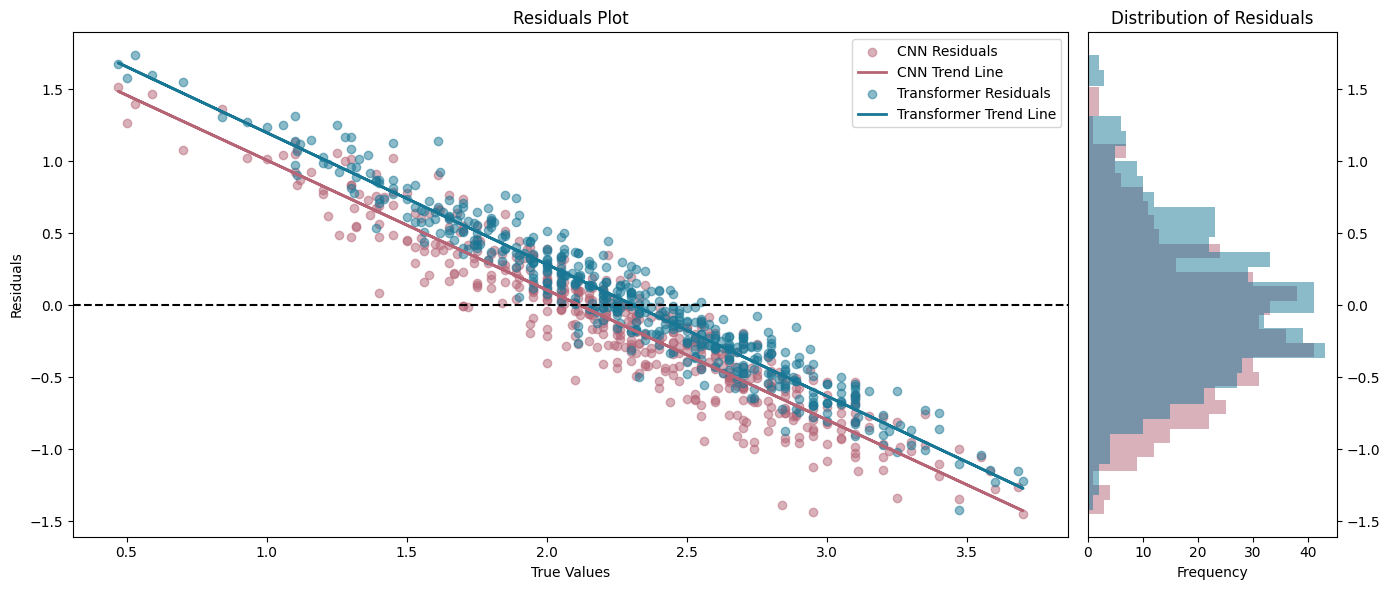

In [26]:

def plot_multiple_residuals(labels, preds_list, names, colors, title='Residuals Plot', save=True):
    fig = plt.figure(figsize=(14, 6))
    gs = gridspec.GridSpec(1, 2, width_ratios=[4, 1])
    color_keys = list(colors.keys())
    color_counter = 0

    # Main plot
    ax0 = plt.subplot(gs[0])

    for preds, name in zip(preds_list, names):
        residuals = np.array(preds) - np.array(labels)
        color = colors[color_keys[color_counter]]
        color_counter = (color_counter + 1) % len(color_keys)

        ax0.scatter(labels, residuals, label=f'{name} Residuals', color=color, alpha=0.5)

        # Fit linear regression model to residuals
        labels_reshaped = np.array(labels).reshape(-1, 1)
        model = LinearRegression()
        model.fit(labels_reshaped, residuals)
        trend_line = model.predict(labels_reshaped)

        # Plot trend line
        ax0.plot(labels, trend_line, color=color, label=f'{name} Trend Line', linewidth=2)

    ax0.set_xlabel('True Values')
    ax0.set_ylabel('Residuals')
    ax0.axhline(y=0, color='k', linestyle='--')
    ax0.set_title(title)
    ax0.legend()

    color_counter = 0
    # Side plot for distribution of residuals
    ax1 = plt.subplot(gs[1], sharey=ax0)
    for preds, name in zip(preds_list, names):
        residuals = np.array(preds) - np.array(labels)
        color = colors[color_keys[color_counter]]
        color_counter = (color_counter + 1) % len(color_keys)
        ax1.hist(residuals, bins=30, alpha=0.5, color=color, orientation='horizontal', label=f'{name} Residuals')

    ax1.set_xlabel('Frequency')
    ax1.set_title('Distribution of Residuals')
    ax1.yaxis.tick_right()
    ax1.yaxis.set_label_position("right")

    plt.tight_layout()
    # Save plot
    if save:
        save_plot(plt, title)
    
    return plt

plot_multiple_residuals(labels_cnn, [preds_cnn, preds_trans], ['CNN', 'Transformer'], colors=COLORS).show()